In [1]:
import pandas as pd
import nltk
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

In [25]:
# Carregar o DataFrame com os textos

#df = pd.read_excel('./posts_rotulados_dataset_II.xlsx')


# Selecionar apenas os posts Não Relevantes
#df = df[df['Relevante'] == 'Não'].reset_index(drop=True)

# Selecionar apenas os posts Relevantes
#df = df[df['Relevante'] == 'Sim'].reset_index(drop=True)


#df = pd.read_excel('./tweets_ptbr_prob_relevancia_prev_bin_com_ioc_e_keywords.xlsx')

df = pd.read_excel('./posts_novos_ptbr_prob_relevancia_prev_bin_com_ioc_e_keywords.xlsx')

# Selecionar apenas os posts Não Relevantes
#df = df[df['previsao_binaria'] == 0].reset_index(drop=True)

# Selecionar apenas os posts Relevantes
df = df[df['previsao_binaria'] == 1].reset_index(drop=True)


# Selecionar apenas os tweets previstos como Relevância BAIXA
#df = df[df['Relevância'] == 'Baixa'].reset_index(drop=True)

# Selecionar apenas os tweets previstos como Relevância MÉDIA
#df = df[df['Relevância'] == 'Média'].reset_index(drop=True)

# Selecionar apenas os tweets previstos como Relevância ALTA
#df = df[df['Relevância'] == 'Alta'].reset_index(drop=True)

In [26]:
df

,id,category,title,content,answers,tags,created_at,full_text,full_text_ioc,IOC,...,CVE,SHA1S,HSH,MD5S,SHA256S,IPV6S,Keywords,probabilidade,Relevância,previsao_binaria
0,3,Hacking,"DATA BASE, DBS, DADOS",gostaria de saber onde posso encotrar dbs de e...,"[{'id': 50405, 'questionId': 9304, 'answerCont...","['hacking', 'dados', 'dbs', 'database']",2022-09-10 01:03:29,data base dbs dados gostaria saber onde posso ...,"DATA BASE, DBS, DADOS gostaria de saber onde p...",Não,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.607380,Média,1
1,5,Links,"grupos de telegram sobre hacking, dw, shitpost...","alguem tem links de grupos de telegram legais,...","[{'id': 50409, 'questionId': 9306, 'answerCont...","['#telegram', '#grupo', '#zapzap']",2022-09-10 04:05:30,grupos telegram hacking shitpost qualquer otra...,"grupos de telegram sobre hacking, dw, shitpost...",Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.571328,Média,1
2,6,Hacking,alguém sabe onde e qual site de confiança pra ...,NaN,"[{'id': 50410, 'questionId': 9307, 'answerCont...","['#hacking', '#dados']",2022-09-10 04:02:43,sabe onde site confianca contratar hacker prof...,alguém sabe onde e qual site de confiança pra ...,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.672353,Média,1
3,14,Ciência e tecnologia,algum link sobre hacking ou fórum ?,NaN,"[{'id': 50434, 'questionId': 9315, 'answerCont...",NaN,2022-09-10 18:36:06,link hacking forum,algum link sobre hacking ou fórum ? nan [{ 'q...,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.559482,Média,1
4,16,Links,Divirtam-se com esses links! :),"Bom... frequento a rede onion faz um tempo, en...","[{'id': 50442, 'questionId': 9317, 'answerCont...",NaN,2022-09-10 18:53:58,divirtam links frequento rede onion faz tempo ...,Divirtam-se com esses links! :) Bom... frequen...,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.520028,Média,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,7454,Hacking,"Eu novamente, falando sobre vírus","Olá amigos, alguem tem algum site que tem down...","[{'id': 64685, 'questionId': 12260, 'answerCon...","['#hacking', '#programação']",2022-12-28 06:04:47,novamente falando virus ola amigos site downlo...,"Eu novamente, falando sobre vírus Olá amigos, ...",Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.615601,Média,1
1154,7455,WTF?,"Plano Infalível ""Golpe em p3dofilos""",Montei um plano de estelionato que na teoria f...,"[{'id': 64701, 'questionId': 12263, 'answerCon...","['golpe', 'inteligência', 'planos', 'teste']",2022-12-28 12:39:56,plano infalivel golpe dofilos montei plano est...,"Plano Infalível ""Golpe em p3dofilos"" Montei um...",Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.615514,Média,1
1155,7475,Darknet e Tor,O que falta para a DW se tornar mainstream?,Caras é muito fácil acessar qualquer site da o...,"[{'id': 65617, 'questionId': 12439, 'answerCon...",['#privacidade'],2023-01-03 05:31:28,falta tornar mainstream caras facil acessar qu...,O que falta para a DW se tornar mainstream? Ca...,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.747015,Alta,1
1156,7481,Conhecimento e informação,Me contem uma maneira de puxar dados,NaN,"[{'id': 65703, 'questionId': 12451, 'answerCon...",NaN,2023-01-03 19:27:40,contem maneira puxar dados falaram grupos tele...,Me contem uma maneira de puxar dados nan [{ '...,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,Sim,0.691529,Média,1


In [107]:
'''
# Remover novas stopwors
stop_words = ["aqui", "pode", "sobre", "fazer", "alguem", "tudo", "coisa", "novato", "bem",
              "vou", "sei", "boca", "algum", "alguns", "alguma", "algo", "nada", "bom", "entao",
              "quer", "the", "and", "you", "cara", "coisas", "sim", "ainda", "ver", "usar", 
              "assim", "acho"]
'''

'\n# Remover novas stopwors\nstop_words = ["aqui", "pode", "sobre", "fazer", "alguem", "tudo", "coisa", "novato", "bem",\n              "vou", "sei", "boca", "algum", "alguns", "alguma", "algo", "nada", "bom", "entao",\n              "quer", "the", "and", "you", "cara", "coisas", "sim", "ainda", "ver", "usar", \n              "assim", "acho"]\n'

In [108]:
'''
def preprocess_text_b(text):
    # Separa em tokens
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens]
    return tokens

# Aplica a função preprocess_text_b a cada documento e cria uma lista de listas de tokens
documents = [preprocess_text_b(doc) for doc in df['text']]
'''

"\ndef preprocess_text_b(text):\n    # Separa em tokens\n    tokens = nltk.word_tokenize(text)\n    # Remove stopwords\n    tokens = [word for word in tokens if word not in stop_words]\n    tokens = [word for word in tokens]\n    return tokens\n\n# Aplica a função preprocess_text_b a cada documento e cria uma lista de listas de tokens\ndocuments = [preprocess_text_b(doc) for doc in df['text']]\n"

In [61]:
import gensim
from gensim import corpora
from gensim.models import LdaModel

#documents = df['text']

documents = df['full_text']

#documents = documentos_selecionados['full_text']

# Transforma a lista de documentos em uma lista de listas de palavras
texts = [str(doc).split() for doc in documents]


# Cria um dicionário com as palavras
dictionary = corpora.Dictionary(texts)

# Filtra palavras raras e stopwords
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Cria o corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Cria o modelo LDA com 10 tópicos
lda_model = LdaModel(
    corpus=corpus,
    num_topics=5,
    id2word=dictionary,
    random_state=51,
    passes=10,
    iterations=1000,
    minimum_probability=0.01
    
)


# Criar listas para armazenar os índices dos documentos
document_indexes = [[] for _ in range(lda_model.num_topics)]

# Itera pelos tópicos
for i in range(lda_model.num_topics):
    # Seleciona os termos do tópico com probabilidade mínima de 0.01
    topic_terms = lda_model.get_topic_terms(i)
    # Imprime os termos selecionados
    print(f"Tópico {i}: {[dictionary[id] for id, _ in topic_terms]}")
    
   
    # Obtém os documentos com a maior probabilidade para o tópico atual
    top_documents = []
    for doc in corpus:
        doc_topics = lda_model.get_document_topics(doc, minimum_probability=0)
        if doc_topics:
            top_topic = max(doc_topics, key=lambda x: x[1])[0]
            if top_topic == i:
                top_documents.append(doc)
    
    # Armazena os índices dos documentos do tópico atual    
    document_indexes[i] = [i for i, doc in enumerate(corpus) if doc in top_documents]
    

print()  # linha em branco para separar

# Quantifica quantos documentos estão associados a cada tópico
topic_count = [0] * lda_model.num_topics
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc, minimum_probability=0)
    if doc_topics:
        top_topic = max(doc_topics, key=lambda x: x[1])[0]
        topic_count[top_topic] += 1

total_docs = 0
for i, count in enumerate(topic_count):
    print(f"Quantidade de documentos no tópico {i}: {count}")           
    total_docs += count
print(f"Total de Documentos: {total_docs}")

# Imprimir as listas de índices dos documentos
for i in range(lda_model.num_topics):
    print()  # linha em branco para separar os tópicos
    print(f"Documentos do tópico {i}: {document_indexes[i]}")


Tópico 0: ['pessoas', 'hacking', 'servidor', 'dados', 'gente', 'site', 'link', 'saber', 'sites', 'seguranca']
Tópico 1: ['dados', 'cpf', 'telegram', 'pessoa', 'nome', 'site', 'numero', 'email', 'acesso', 'onde']
Tópico 2: ['linux', 'kali', 'site', 'windows', 'base', 'caso', 'rodar', 'rede', 'usando', 'vpn']
Tópico 3: ['senhas', 'programa', 'dados', 'pessoa', 'senha', 'sistema', 'qualquer', 'spyware', 'lugar', 'contato']
Tópico 4: ['conta', 'hackear', 'social', 'engenharia', 'senha', 'pessoa', 'tipo', 'hacking', 'celular', 'dar']

Quantidade de documentos no tópico 0: 154
Quantidade de documentos no tópico 1: 207
Quantidade de documentos no tópico 2: 36
Quantidade de documentos no tópico 3: 51
Quantidade de documentos no tópico 4: 147
Total de Documentos: 595

Documentos do tópico 0: [1, 5, 7, 13, 14, 17, 19, 20, 23, 28, 31, 38, 41, 46, 50, 59, 60, 67, 71, 77, 81, 82, 89, 90, 92, 94, 96, 100, 103, 110, 117, 118, 119, 121, 125, 128, 137, 143, 144, 148, 149, 156, 157, 166, 167, 168, 169, 

In [152]:
df.reset_index(drop=True, inplace=True)

df['full_text'][143]

'free hacking tools site confiavel navegando deep web deparei site diz distribuir ferramentas hacking gratuitamente gerador contas netflix facebook hacker gostaria saber site confiavel grato link site citado confiavel custo sugiro faca seguinte crie vmware rwindows baixe arquivo descompacte corra setup dentro maquina virtual der errado estragar maquina virtual tao ruim criar quantas quiser posta resultado gente vlw certamente espertinho querendo intalar trojan'

In [137]:
# Lista de índices dos documentos
document_indices = [143, 814, 2549, 11107]

# Selecionar todos os documentos com base nos índices
documentos_selecionados = df.iloc[document_indices]

In [128]:
# Mostrar os documentos selecionados
documentos_selecionados

,ID,category,category_n,title,content,answers,tags,created_at,IOC,IP,...,DOM,ASN,IP6,MAC,RKP,interacoes,full_text,Relevante,Back_Relevante,Keywords
143,143,Other,outros,Free Hacking Tools - Esse site é confiável?,"Estava navegando na Deep Web, quando me depare...","[{'user': {'title': 'Novato', 'name': 'Profile...","['hack', 'hacking', 'fht', 'free', 'tools']",2017-03-03,Sim,NaN,...,NaN,NaN,NaN,NaN,NaN,3,free hacking tools site confiavel navegando de...,Sim,Sim,Sim
814,814,Money,outros,"dados pessoais, alguém compra?","tenho dados pessoais em grande quantidade, com...","[{'user': {'title': 'Patrimônio', 'name': '♦Ex...","['hack', 'dados', 'vendas']",2020-08-18,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,10,dados pessoais compra dados pessoais grande qu...,Sim,Verificar,Sim
2549,2549,Governments and law,outros,Decretos de Governadores,Qual a opinião de vocês sobre esses decretos d...,"[{'user': {'title': 'Patrimônio', 'name': 'Bro...",[],2021-03-04,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,9,decretos governadores opiniao decretos governa...,Não,Verificar,Sim
11107,11107,Governments and law,outros,fake news,"Mano com essa merda toda rolando, você acredit...","[{'user': {'title': None, 'name': 'Anônimo', '...","['constituição', 'fake-news', 'senado', 'brasi...",2020-07-06,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,9,fake news mano merda toda rolando acredita rol...,Não,Não,Não
50,50,Other,outros,o bestgore.com caiu ou so eu q n to conseguind...,NaN,"[{'user': {'title': 'Mitológico', 'name': 'Chr...",['pergunta'],2020-12-12,Sim,NaN,...,1.0,NaN,NaN,NaN,NaN,6,bestgore caiu conseguindo acessar falaram site...,Não,Verificar,Não
70,70,Cryptocurrencies,Computação,como minerar LTC,NaN,"[{'user': {'title': 'Regular', 'name': 'Destro...","['criptomoeda', 'ltc', 'minerar']",2020-02-09,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,2,minerar ltc diversas plataformas ltc primeiras...,Não,Não,Não


In [81]:
# Salvar os documentos selecionados em um arquivo
documentos_selecionados.to_excel('documentos_topicos.xlsx', index=True)

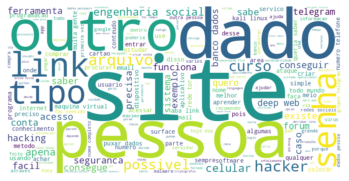

In [21]:
# Gerar Nuvem de Palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# criar um objeto WordCloud
#wc = WordCloud(width=800, height=400, background_color="white", max_words=200, stopwords=[])
wc = WordCloud(width=800, height=400, background_color="white", max_words=200, stopwords=[])

# criar o texto para a nuvem de palavras
#text = ' '.join(df_topicos_key_ioc['full_text'].dropna().tolist())
#text = ' '.join(df_top_0['full_text'].dropna().tolist())
#text = ' '.join(df['full_text'].dropna().tolist())
text = ' '.join(df['full_text'].dropna().tolist())

# gerar a nuvem de palavras
wc.generate(text)

# exibir a nuvem de palavras
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.show()
#plt.savefig("nuvem_de_palavras_posts_rel.jpg", dpi=500, bbox_inches='tight')
plt.savefig("teste_nuvem_de_palavras_CJ_DADOS_III_relevantes.png", dpi=500, bbox_inches='tight')

In [53]:
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
#plt.savefig("nuvem_de_palavras_5.jpg", dpi=500, bbox_inches='tight')

KeyboardInterrupt: 

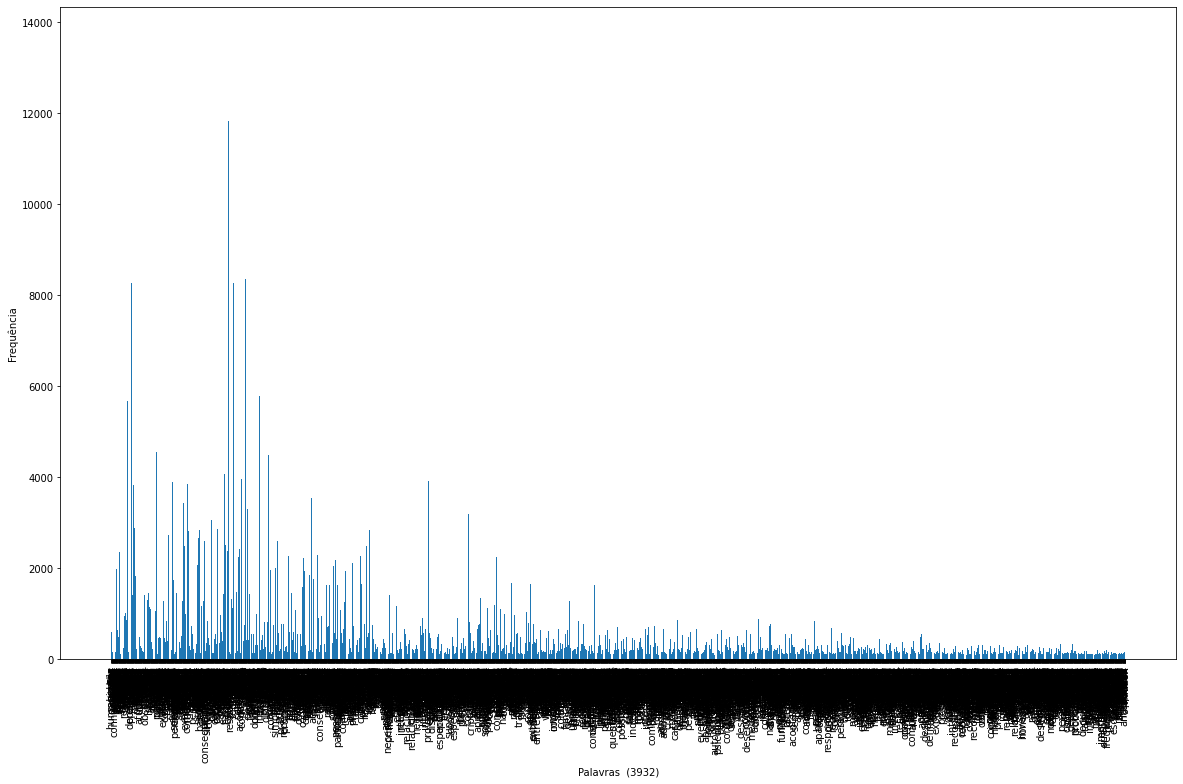

In [31]:
from collections import Counter

# criar o texto para contar a frequência das palavras

text = ' '.join(df['full_text'].dropna().tolist())


# dividir o texto em palavras
words = text.split()

# contar a frequência de cada palavra
word_counts = Counter(words)

# extrair as palavras e suas contagens, considerando apenas as que apareceram mais de (min_freq) vezes
min_freq = 100
cont_palavras = 0
word_list = []
count_list = []
for word, count in word_counts.items():
    if count > min_freq:
        word_list.append(word)
        count_list.append(count)
        cont_palavras +=1

# exibir as contagens das palavras em um gráfico de barras
plt.figure(figsize=(20, 12))
plt.bar(word_list, count_list)
plt.xlabel('Palavras  ({})'.format(cont_palavras))
plt.ylabel('Frequência')
#plt.title('Frequência das Palavras (aparecem mais de {} vezes)'.format(min_freq))
plt.xticks(rotation=90)
#plt.show()
#plt.savefig("palavras_mais_freq_posts_rel.jpg", dpi=500, bbox_inches='tight')
plt.savefig("palavras_mais_freq_CJ_DADOS_III_relevantes.png", dpi=500, bbox_inches='tight')

1 - dados
2 - site
3 - conta
4 - pessoa
5 - tipo
6 - nome
7 - boa
8 - melhor
9 - pessoas
10 - onde
11 - senha
12 - telegram
13 - faz
14 - rede
15 - informacoes
16 - agora
17 - saber
18 - qualquer
19 - cpf
20 - acesso
21 - forma
22 - caso
23 - porque
24 - hacking
25 - forum
26 - dar
27 - tempo
28 - link
29 - sites
30 - mano
31 - realmente
32 - linux
33 - sabe
34 - obrigado
35 - sistema
36 - tor
37 - email
38 - sempre
39 - possivel
40 - apenas
41 - facil
42 - posso
43 - seguranca
44 - numero
45 - outra
46 - precisa
47 - todos
48 - celular
49 - outro
50 - dinheiro
51 - maquina
52 - internet
53 - pergunta
54 - todo
55 - conseguir
56 - uso
57 - usando
58 - pois
59 - certo
60 - achar
61 - gente
62 - porem
63 - criar
64 - queria
65 - hacker
66 - existe
67 - web
68 - google
69 - hackear
70 - amigo
71 - falar
72 - exemplo
73 - outros
74 - menos
75 - dia
76 - vpn
77 - aprender
78 - quero
79 - links
80 - talvez
81 - pouco
82 - disse
83 - grupo
84 - windows
85 - vez
86 - nunca
87 - curso
88 - tent

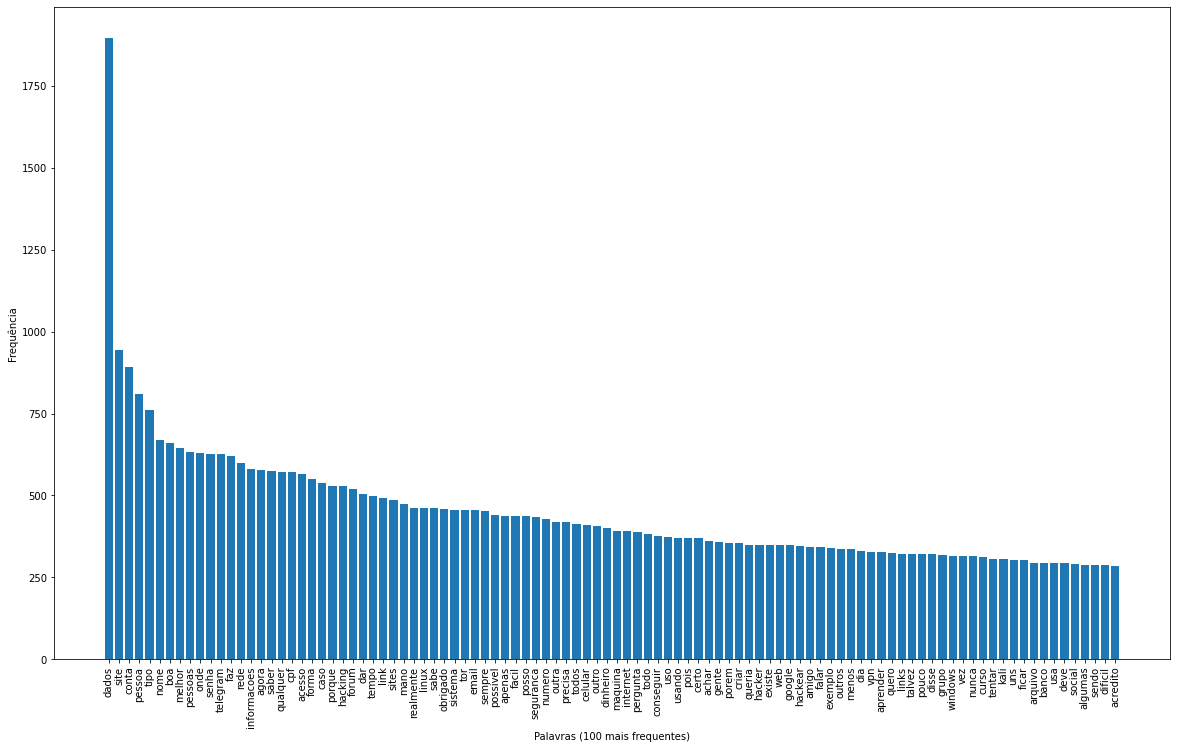

In [27]:
from collections import Counter
import matplotlib.pyplot as plt

# criar o texto para contar a frequência das palavras
text = ' '.join(df['full_text'].dropna().tolist())

# dividir o texto em palavras
words = text.split()

# contar a frequência de cada palavra
word_counts = Counter(words)

# extrair as 100 palavras mais frequentes
top_words = word_counts.most_common(100)

# extrair as palavras e suas contagens
word_list, count_list = zip(*top_words)

##


# Criar a lista numerada de palavras
numbered_word_list = [f"{i+1} - {word}" for i, word in enumerate(word_list)]

# Exibir a lista numerada no console
for numbered_word in numbered_word_list:
    print(numbered_word)

# Salvar a lista numerada em um arquivo de texto
with open("100_lista_palavras_mais_frequentes_III_rel.txt", "w", encoding="utf-8") as file:
    file.write('\n'.join(numbered_word_list))


##


# exibir as contagens das palavras em um gráfico de barras
plt.figure(figsize=(20, 12))
plt.bar(word_list, count_list)
plt.xlabel('Palavras (100 mais frequentes)')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.savefig("100palavras_mais_frequentes_CJ_DADOS_III_relevantes.png", dpi=500, bbox_inches='tight')
